In [41]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plot
from contextlib import closing
from matplotlib.pyplot import cm
import matplotlib.image as mpimg
import rasterio
import os
import shutil
import netCDF4
%matplotlib inline

In [42]:
prcp_2015 = "/Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na.nc4"

In [43]:
ncfile = xr.open_dataset(prcp_2015)
ncfile.info()

xarray.Dataset {
dimensions:
	nv = 2 ;
	time = 365 ;
	x = 7814 ;
	y = 8075 ;

variables:
	float32 x(x) ;
		x:units = m ;
		x:long_name = x coordinate of projection ;
		x:standard_name = projection_x_coordinate ;
	float32 y(y) ;
		y:units = m ;
		y:long_name = y coordinate of projection ;
		y:standard_name = projection_y_coordinate ;
	float32 lat(y, x) ;
		lat:units = degrees_north ;
		lat:long_name = latitude coordinate ;
		lat:standard_name = latitude ;
	float32 lon(y, x) ;
		lon:units = degrees_east ;
		lon:long_name = longitude coordinate ;
		lon:standard_name = longitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
		time:bounds = time_bnds ;
	int16 yearday(time) ;
		yearday:long_name = yearday ;
	float32 time_bnds(time, nv) ;
	int16 lambert_conformal_conic() ;
		lambert_conformal_conic:grid_mapping_name = lambert_conformal_conic ;
		lambert_conformal_conic:longitude_of_central_meridian = -100.0 ;
		lambert_conformal_conic:latitude_of_projection_origin = 42.5 ;
		lamber

In [20]:
print('variables')
for v in ncfile.variables:
    print(v)

variables
x
y
lat
lon
time
yearday
time_bnds
lambert_conformal_conic
prcp


In [44]:
ncfile.variables['prcp'][:]

<xarray.Variable (time: 365, y: 8075, x: 7814)>
[1555951770 values with dtype=float64]
Attributes:
    long_name:     daily total precipitation
    units:         mm/day
    grid_mapping:  lambert_conformal_conic
    cell_methods:  area: mean time: sum

In [64]:
prcp_2015 = "/Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na.nc4"
abc = netCDF4.Dataset(prcp_2015,"r",format='NETCDF4')
print(abc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    start_year: 2015
    source: Daymet Software Version 3.0
    Version_software: Daymet Software Version 3.0
    Version_data: Daymet Data Version 3.0
    Conventions: CF-1.6
    citation: Please see http://daymet.ornl.gov/ for current Daymet data citation information
    references: Please see http://daymet.ornl.gov/ for current information on Daymet references
    dimensions(sizes): x(7814), y(8075), time(365), nv(2)
    variables(dimensions): float32 x(x), float32 y(y), float32 lat(y,x), float32 lon(y,x), float32 time(time), int16 yearday(time), float32 time_bnds(time,nv), int16 lambert_conformal_conic(), float32 prcp(time,y,x)
    groups: 



In [67]:
print (abc.variables.keys())
print (abc.variables['prcp'])

odict_keys(['x', 'y', 'lat', 'lon', 'time', 'yearday', 'time_bnds', 'lambert_conformal_conic', 'prcp'])
<class 'netCDF4._netCDF4.Variable'>
float32 prcp(time, y, x)
    _FillValue: -9999.0
    long_name: daily total precipitation
    units: mm/day
    missing_value: -9999.0
    coordinates: lat lon
    grid_mapping: lambert_conformal_conic
    cell_methods: area: mean time: sum
unlimited dimensions: time
current shape = (365, 8075, 7814)
filling on


odict_keys(['x', 'y', 'lat', 'lon', 'time', 'yearday', 'time_bnds', 'lambert_conformal_conic', 'prcp'])
<class 'netCDF4._netCDF4.Variable'>
float32 prcp(time, y, x)
    _FillValue: -9999.0
    long_name: daily total precipitation
    units: mm/day
    missing_value: -9999.0
    coordinates: lat lon
    grid_mapping: lambert_conformal_conic
    cell_methods: area: mean time: sum
unlimited dimensions: time
current shape = (365, 8075, 7814)
filling on


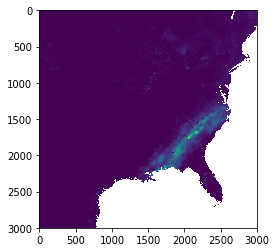

In [63]:
import numpy as np 
src = netCDF4.Dataset(prcp_2015,"r",format='NETCDF4')
print (src.variables.keys())
print (src.variables['prcp'])
data = src.variables["prcp"][-1,4000:7000,4000:7000]
data.shape
plot.imshow(data)

In [ ]:
from mpl_toolkits.basemap import Basemap
parallels = np.arange(10000,20000,1000.) 
meridians = np.arange(-20000,-30000,1000.) 
map = Basemap(projection='merc',llcrnrlon=-93.,llcrnrlat=35.,urcrnrlon=-73.,urcrnrlat=45.,resolution='i')
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)


In [38]:
ncfile.lambert_conformal_conic.loc[1].plot()

IndexError: too many indices

In [ ]:
ncfile.lambert_conformal_conic[].plot(cmap=cm.gist_gray)

In [ ]:
gdalwarp -t_srs "+proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +units=m +no_defs" -of netCDF C:/Radar/precip_aeqd-1000.201408.nc C:/Radar/RadarPrecip_UTM33proj.nc

In [15]:
prcp_2015 = "/Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na.nc4"
prcp_2015_edit = "/Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na_edit.vrt"

In [16]:
import os
os.environ["prcp_2015"] = prcp_2015
os.environ["prcp_2015_edit"] = prcp_2015_edit

In [17]:
!gdalinfo %prcp_2015%

Driver: HDF5/Hierarchical Data Format Release 5
Files: /Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na.nc4
Size is 512, 512
Coordinate System is `'
Metadata:
  citation=Please see http://daymet.ornl.gov/ for current Daymet data citation information
  Conventions=CF-1.6
  lambert_conformal_conic_false_easting=0 
  lambert_conformal_conic_false_northing=0 
  lambert_conformal_conic_grid_mapping_name=lambert_conformal_conic
  lambert_conformal_conic_inverse_flattening=298.257223563 
  lambert_conformal_conic_latitude_of_projection_origin=42.5 
  lambert_conformal_conic_longitude_of_central_meridian=-100 
  lambert_conformal_conic_semi_major_axis=6378137 
  lambert_conformal_conic_standard_parallel=25 60 
  lat_long_name=latitude coordinate
  lat_standard_name=latitude
  lat_units=degrees_north
  lon_long_name=longitude coordinate
  lon_standard_name=longitude
  lon_units=degrees_east
  nv_CLASS=DIMENSION_SCALE
  nv_NAME=This is a netCDF dimension but not a netCDF variab

HDF5-DIAG: Error detected in HDF5 (1.8.14) thread 0:
  #000: ..\..\src\H5Ddeprec.c line 255 in H5Dopen1(): not found
    major: Dataset
    minor: Object not found
  #001: ..\..\src\H5Gloc.c line 430 in H5G_loc_find(): can't find object
    major: Symbol table
    minor: Object not found
  #002: ..\..\src\H5Gtraverse.c line 861 in H5G_traverse(): internal path traversal failed
    major: Symbol table
    minor: Object not found
  #003: ..\..\src\H5Gtraverse.c line 641 in H5G_traverse_real(): traversal operator failed
    major: Symbol table
    minor: Callback failed
  #004: ..\..\src\H5Gloc.c line 385 in H5G_loc_find_cb(): object 'xx' doesn't exist
    major: Symbol table
    minor: Object not found
HDF5-DIAG: Error detected in HDF5 (1.8.14) thread 0:
  #000: ..\..\src\H5D.c line 415 in H5Dclose(): not a dataset
    major: Invalid arguments to routine
    minor: Inappropriate type
HDF5-DIAG: Error detected in HDF5 (1.8.14) thread 0:
  #000: ..\..\src\H5Ddeprec.c line 255 in H5Dopen1()

In [ ]:
gdalwarp -t_srs "+proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +units=m +no_defs" -of vrt 

In [ ]:
gdal_translate -of VRT -tr 0.00 -a_nodata -9999 HDF5:"/Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na.nc4"://prcp /Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na_edit.vrt  
gdalwarp -of vrt -co COMPRESS=LZW -t_srs EPSG:4326 /Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na_edit.vrt /Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na_edit2.vrt

In [ ]:
gdalwarp -of vrt -t_srs EPSG:4326 -to SRC_METHOD=NO_GEOTRANSFORM HDF5:"/Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na.nc4"://prcp /Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na_edit3.vrt 

In [ ]:
gdal_translate -of VRT HDF5:"/Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na.nc4"://prcp -sds /Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na_edit3.vrt
    gdalwarp -of vrt -co COMPRESS=LZW -t_srs EPSG:4326 /Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na_edit.vrt /Users/Max81007/Desktop/Python/Prep/NA_prep/daymet_v3_prcp_2015_na_edit4.vrt